In [1]:
%load_ext autoreload
%autoreload 2


import numpy as np
import sys

import matplotlib.pyplot as plt  
import seaborn as sns
import figures as figs
import calculations
from types import SimpleNamespace
import pandas as pd

# Ploting jacobians wrt ptilde
from matplotlib.ticker import FormatStrFormatter

from seaborn import set_palette
from matplotlib import rc
plt.style.use('seaborn-v0_8-white')
set_palette("colorblind")
rc('font',**{'family':'serif','serif': ['Palatino']})
rc('text',usetex=True)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

# Should make insure text size in latex mode
# plt.rcParams.update({
#     "text.latex.preamble": r"\usepackage{palatino} \normalsize"
# })

from IHANKModel import IHANKModelClass



In [2]:
model = IHANKModelClass()
save_figs = True
shock = calculations.difine_shocks(model, scale=0.05, rho = 0.8) 

In [3]:
model_baseline = model.copy(name='Non-Homothetic Preferences')
model_baseline.find_ss()
model_baseline.compute_jacs(do_print=False)
model_baseline.find_transition_path(shocks=shock, do_end_check=False)

In [4]:
model_homothetic = model.copy(name='Homothetic Preferences')
model_homothetic.par.epsilon = 0.0
model_homothetic.par.gamma = 0.18
model_homothetic.find_ss()
model_homothetic.compute_jacs()
model_homothetic.find_transition_path(shocks=shock, do_end_check=False)

In [5]:
models = [model_baseline, model_homothetic]

# Basics

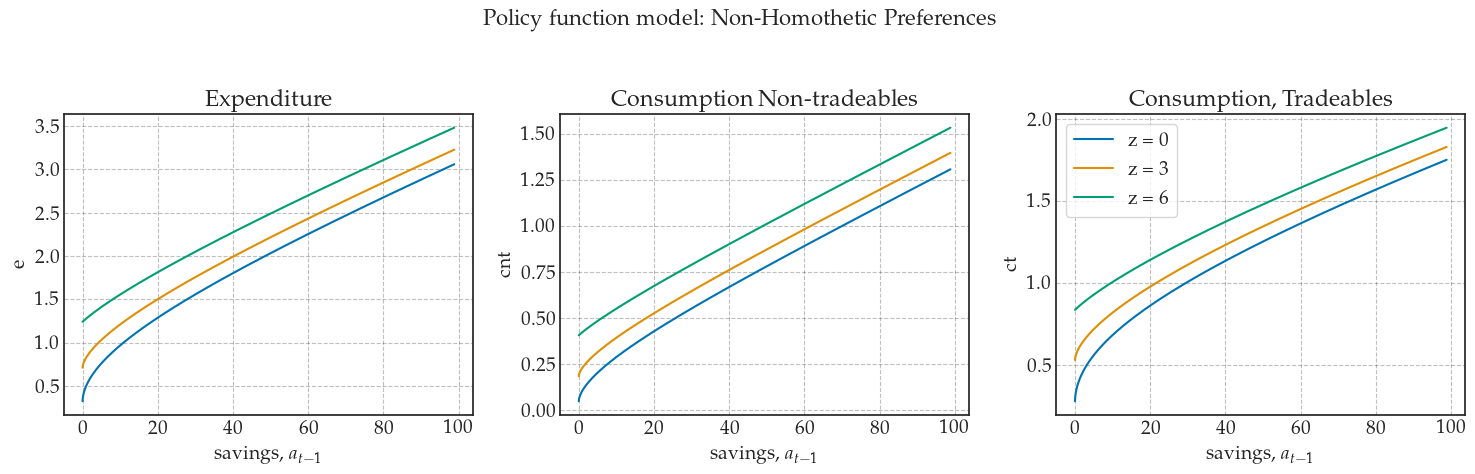

In [ ]:
fig = figs.plot_policy(model_baseline, ['e', 'cnt', 'ct'])
if save_figs: fig.savefig('plots/policy.png', dpi=300, bbox_inches='tight')


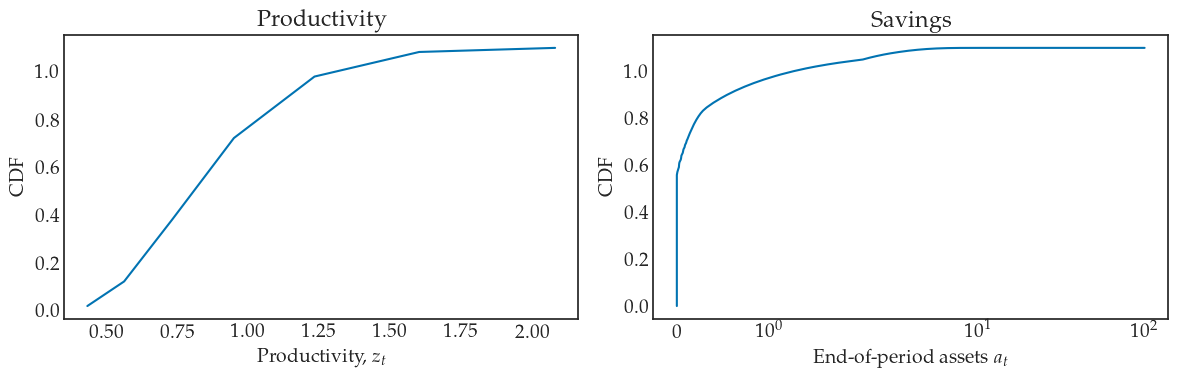

In [ ]:
fig = figs.cum_z_a(model_baseline)
if save_figs: fig.savefig('plots/cum_z_a.png', dpi=300, bbox_inches='tight')


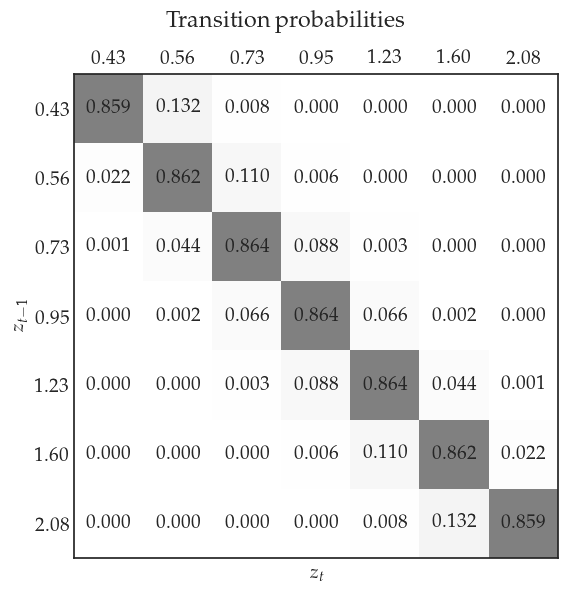

In [ ]:
fig = figs.plot_trans_matrix(model_baseline)
if save_figs: fig.savefig('plots/z_trans.png', dpi=300, bbox_inches='tight')

# Shock 


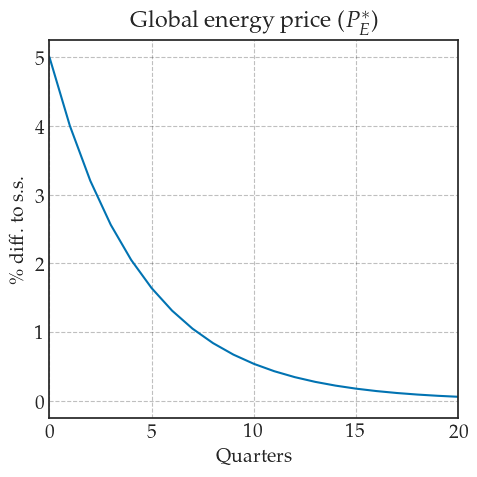

In [ ]:
fig = figs.plot_PE_s(model_baseline)
if save_figs: fig.savefig('plots/PE_shock.png', dpi=300, bbox_inches='tight')

# Jacobians 

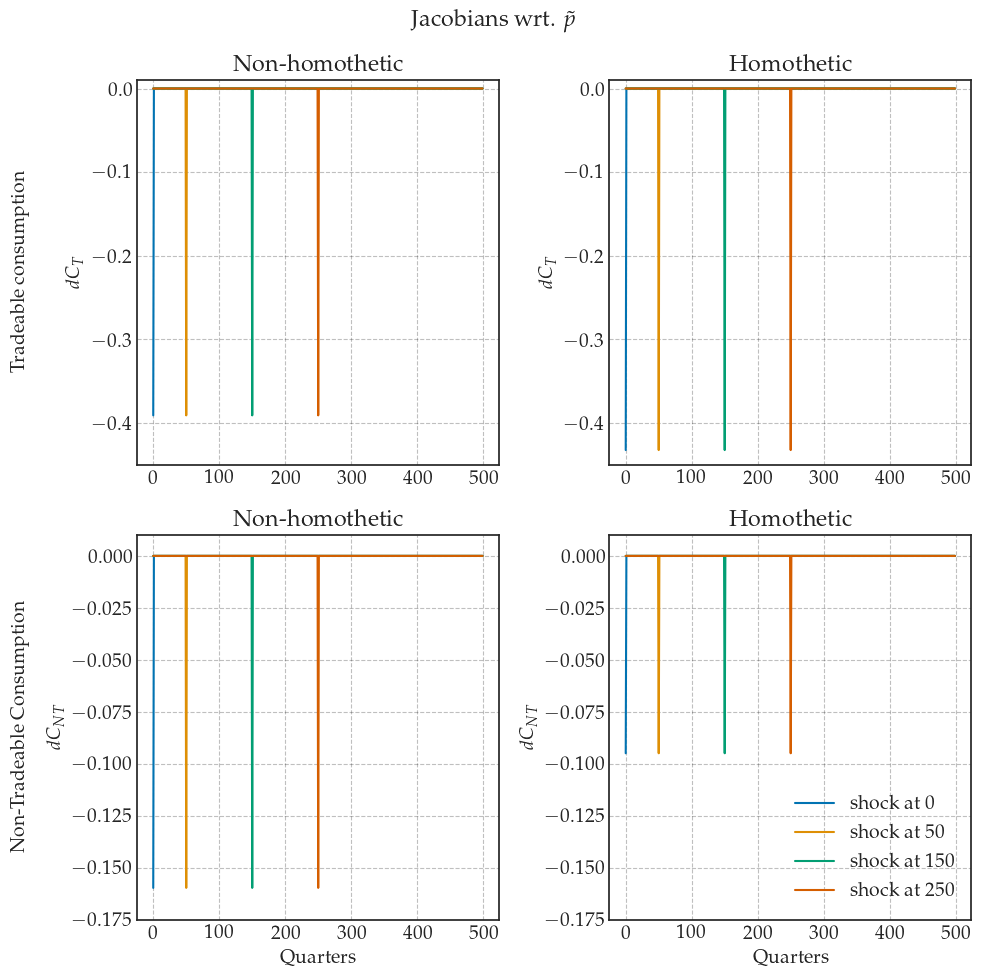

In [ ]:
fig = figs.plot_jac_p(models)
if save_figs: fig.savefig('plots/jac_p.png', dpi=300, bbox_inches='tight')

# IRF's

### All

In [6]:
paths_ = ['YH', 'P', 'w','X','r_real', 'p' ]

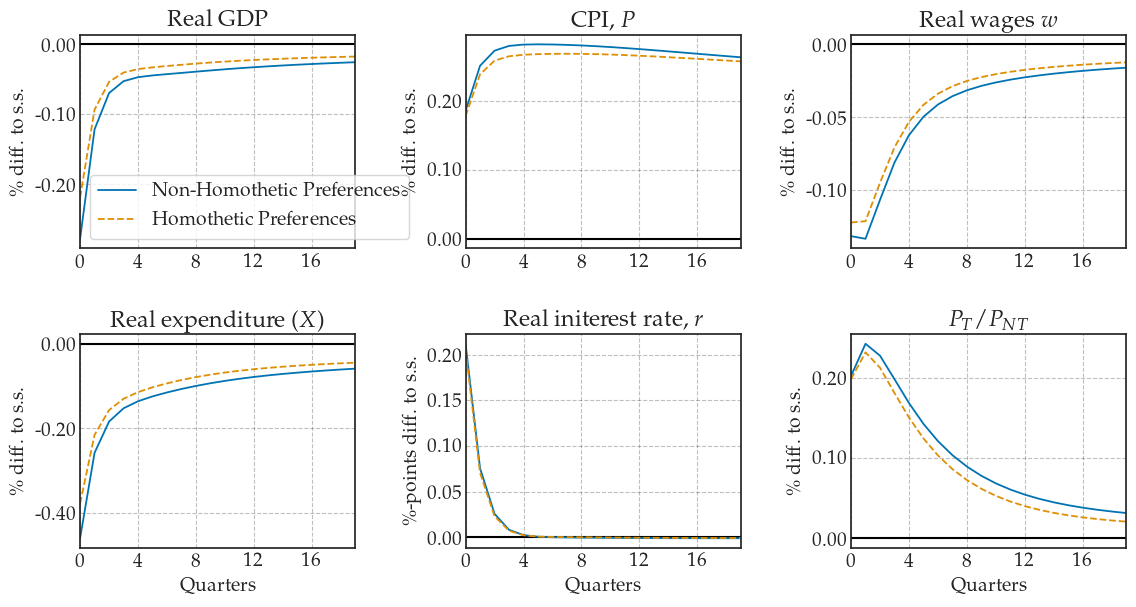

In [7]:
fig = figs.show_IRFs(models, paths_)

if save_figs: fig.savefig('plots/IRFs_main.png', dpi=300, bbox_inches='tight')

### IRF's prices

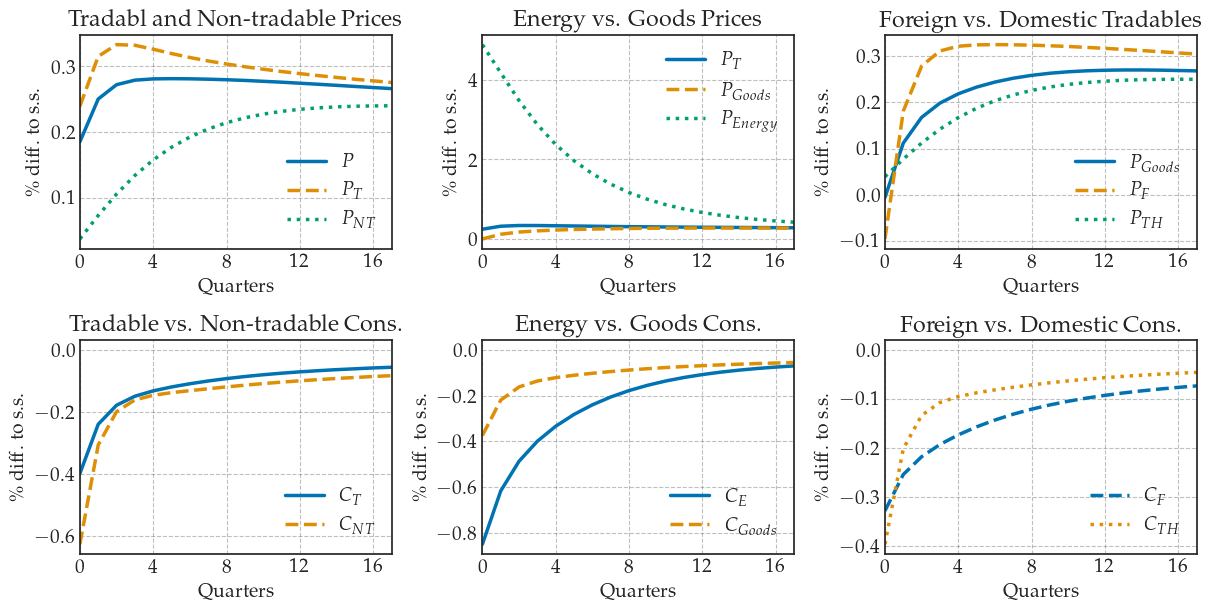

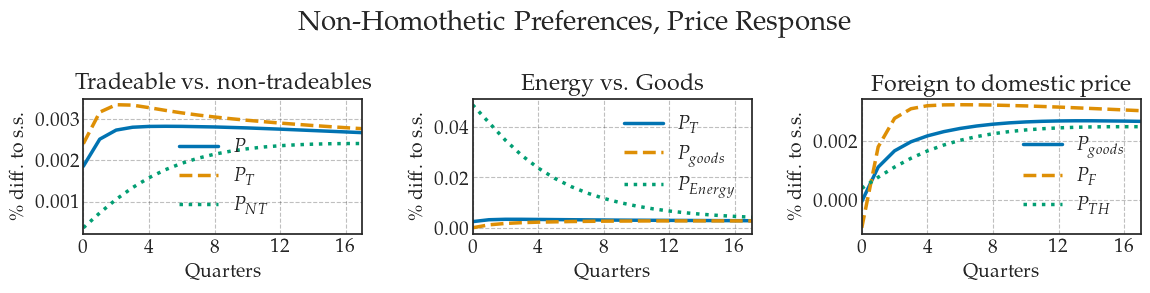

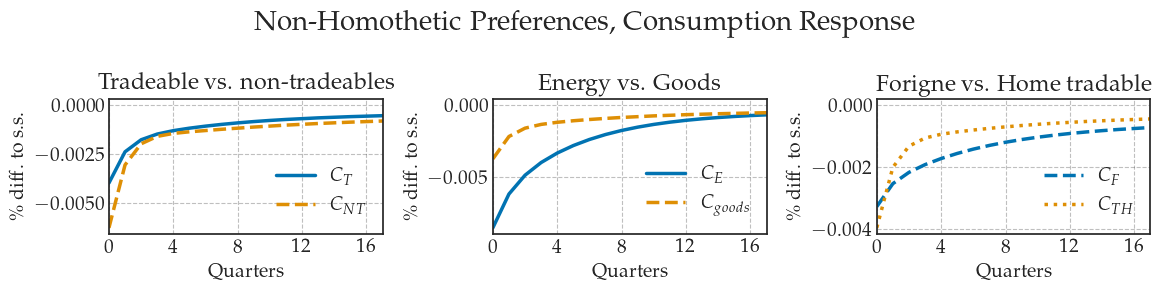

In [ ]:

fig =  figs.show_pc_IRFs(model_baseline)
if save_figs: fig.savefig(f'plots/IRFs_pc.png', dpi=300, bbox_inches='tight')



fig =  figs.show_price_IRFs(model_baseline)
if save_figs: fig.savefig(f'plots/IRFs_p.png', dpi=300, bbox_inches='tight')



fig =  figs.show_c_IRFs(model_baseline)
if save_figs: fig.savefig(f'plots/IRFs_c.png', dpi=300, bbox_inches='tight')


# for model in models:
#     fig =  figs.show_price_IRFs(model)
#     if save_figs: fig.savefig(f'plots/P_{model.name}.png')   
#     fig = figs.show_c_IRFs(model)
#     if save_figs: fig.savefig(f'plots/c_{model.name}.png')


# Importance of epsilon 

In [5]:
model_e1 = IHANKModelClass(name='epsion = 0.10')
model_e1.par.epsilon = 0.10
model_e1.par.gamma = 0.24
model_e1.find_ss()
model_e1.compute_jacs()
model_e1.find_transition_path(shocks=shock, do_end_check=False)

model_e05 = IHANKModelClass(name='epsion = 0.05')
model_e05.par.epsilon = 0.05
model_e05.par.gamma = 0.21
model_e05.find_ss()
model_e05.compute_jacs()
model_e05.find_transition_path(shocks=shock, do_end_check=False)


3.5021330869857508
3.339136971079924
3.249941785986408
3.1688266584056777


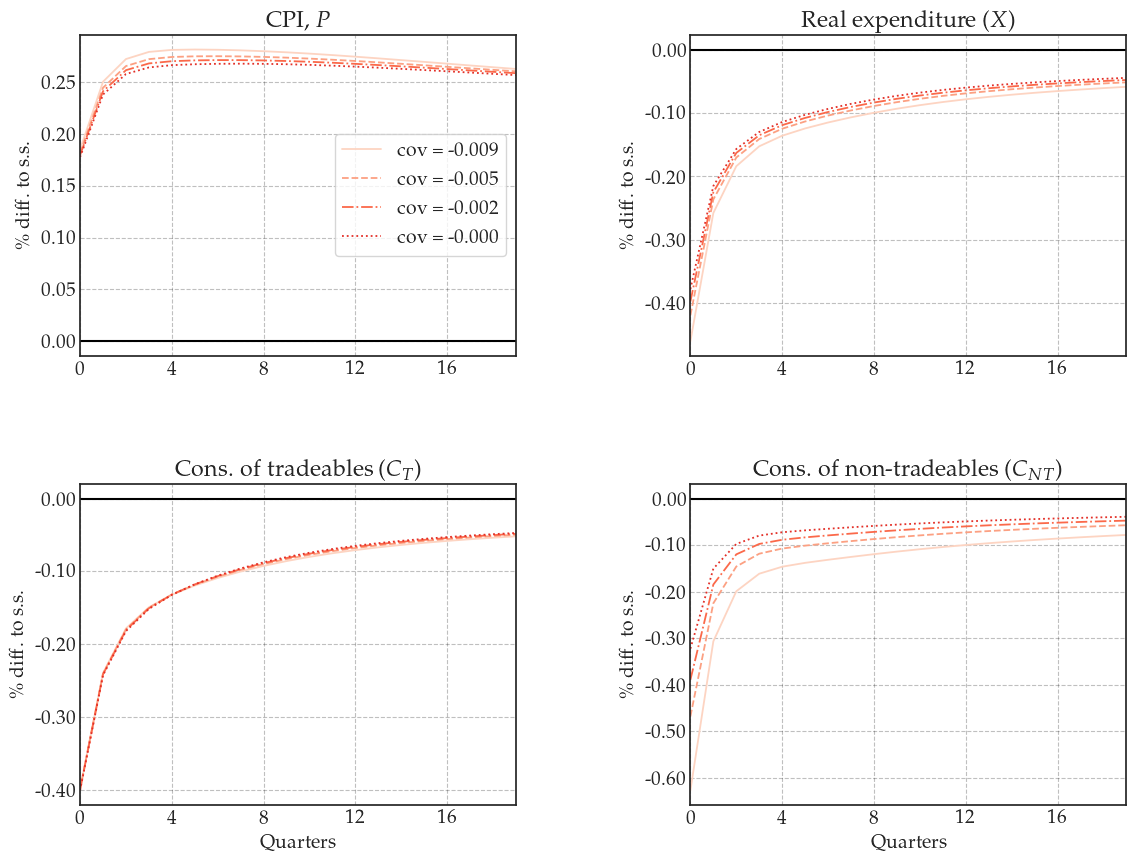

In [6]:
models = [model_baseline,  model_e1, model_e05, model_homothetic]
for model_i in models:
    model_i.calc_additional_new()
    model_i.name = f'cov = {model_i.cov_e_omegaT:.3f}'
    
colors_reds = sns.color_palette("Reds", n_colors=5)
fig = figs.show_IRFs(models, paths=['P', 'X', 'CT', 'CNT' ], colors = colors_reds, maxcol=2)
if save_figs: fig.savefig('plots/IRF_epsion.png', dpi=300, bbox_inches='tight')

# Importance of eta 

In [ ]:
model_g29 = model_baseline.copy()


In [4]:
model_g40 = IHANKModelClass(name='gamma = 0.40')
model_g40.par.gamma = 0.40
model_g40.find_ss()
model_g40.compute_jacs()
model_g40.find_transition_path(shocks=shock, do_end_check=False)


In [5]:
model_g20 = IHANKModelClass(name='gamma = 0.20')
model_g20.par.gamma = 0.20
model_g20.find_ss()
model_g20.compute_jacs()
model_g20.find_transition_path(shocks=shock, do_end_check=False)

3.5021330869857508
3.5021330869857508
3.5021330869857508


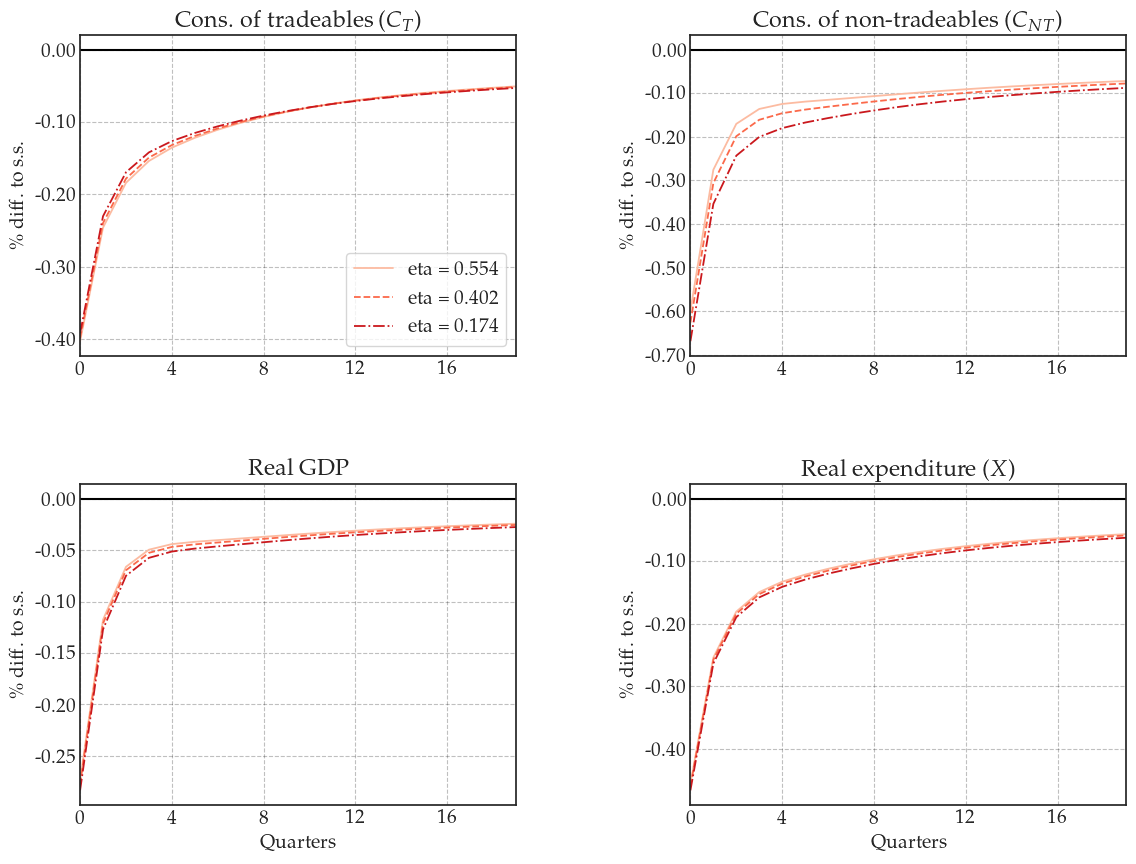

In [6]:
models = [model_g20, model_baseline,  model_g40]
for model_i in models:
    model_i.calc_additional_new()
    model_i.name = f'eta = {model_i.par.eta_T_RA:.3f}'
    
colors_reds = sns.color_palette("Reds", n_colors=3)
path_eta = ['CT', 'CNT', 'YH', 'X'] 
fig = figs.show_IRFs(models, path_eta, colors = colors_reds, maxcol=2)
if save_figs: fig.savefig('plots/IRF_gamma.png', dpi=300, bbox_inches='tight')

# Effect of real wage stabilisation motive 

In [7]:
model_no_ws = IHANKModelClass(name='No Wage Stabilization motive')
model_no_ws.par.real_wage_motive = 0.0
model_no_ws.find_ss()
model_no_ws.compute_jacs()
model_no_ws.find_transition_path(shocks=shock, do_end_check=False)


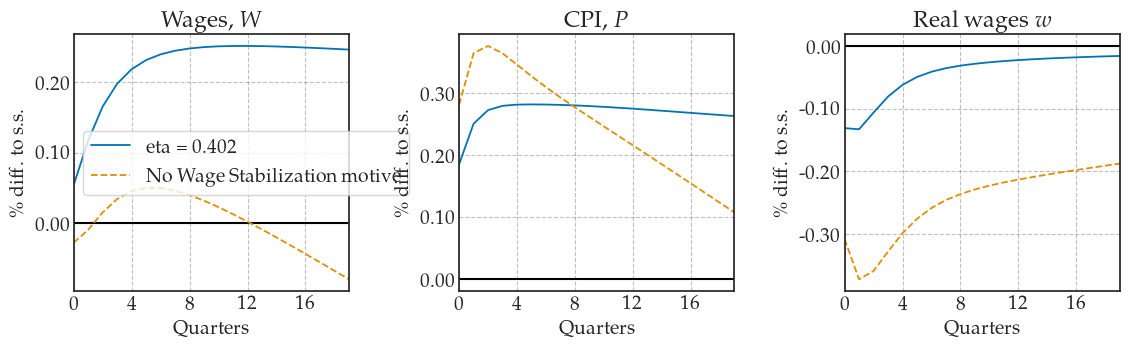

In [8]:
paths_wage_stabilisation = ['W', 'P']
model_baseline.name = 'Baseline'
model_no_ws.name = 'No Wage Stabilization'
fig = figs.show_IRFs([model_baseline, model_no_ws], paths_wage_stabilisation, maxcol=3)
if save_figs: fig.savefig('plots/senesitivity_wage_stabilization.png', dpi=300, bbox_inches='tight')

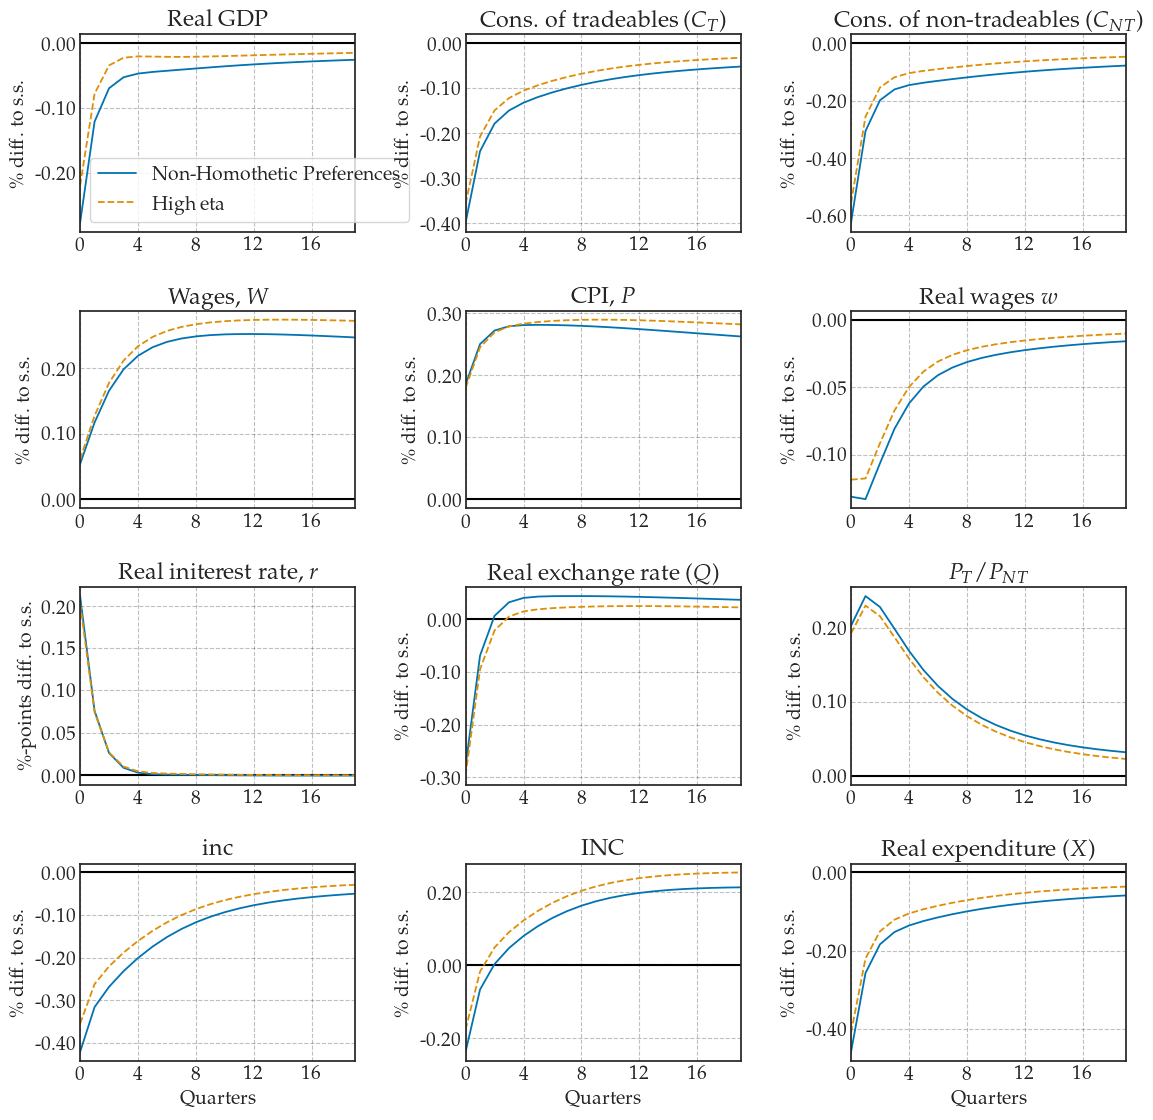

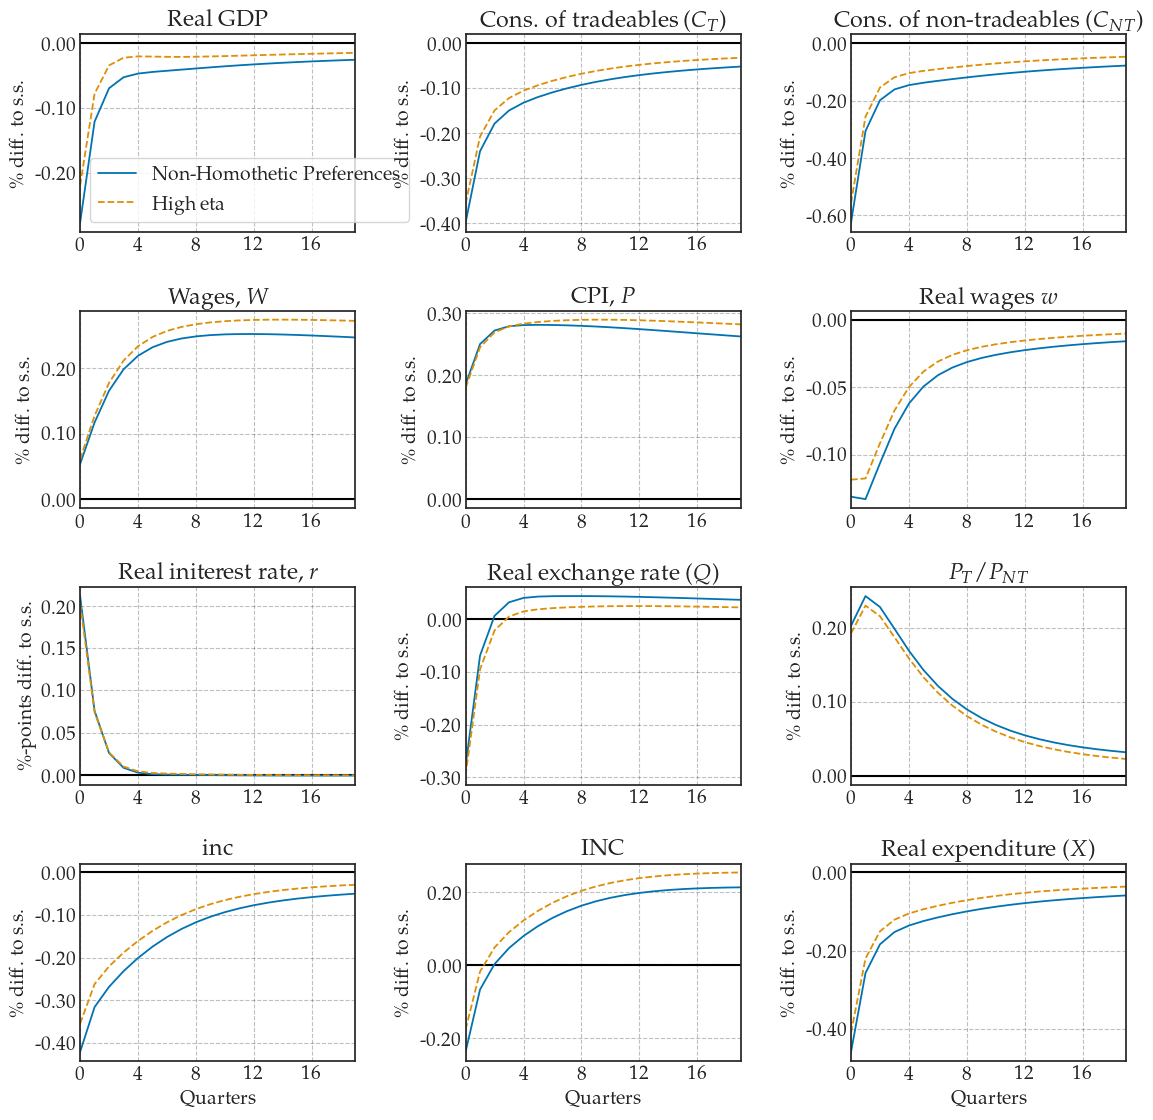

In [8]:
model_high_eta = IHANKModelClass(name='High eta')
model_high_eta.par.etaE = 0.5
# model_high_eta.par.etaF = 0.5
model_high_eta.find_ss()
model_high_eta.compute_jacs()
model_high_eta.find_transition_path(shocks=shock, do_end_check=False)

figs.show_IRFs([model_baseline, model_high_eta], maxcol=3)



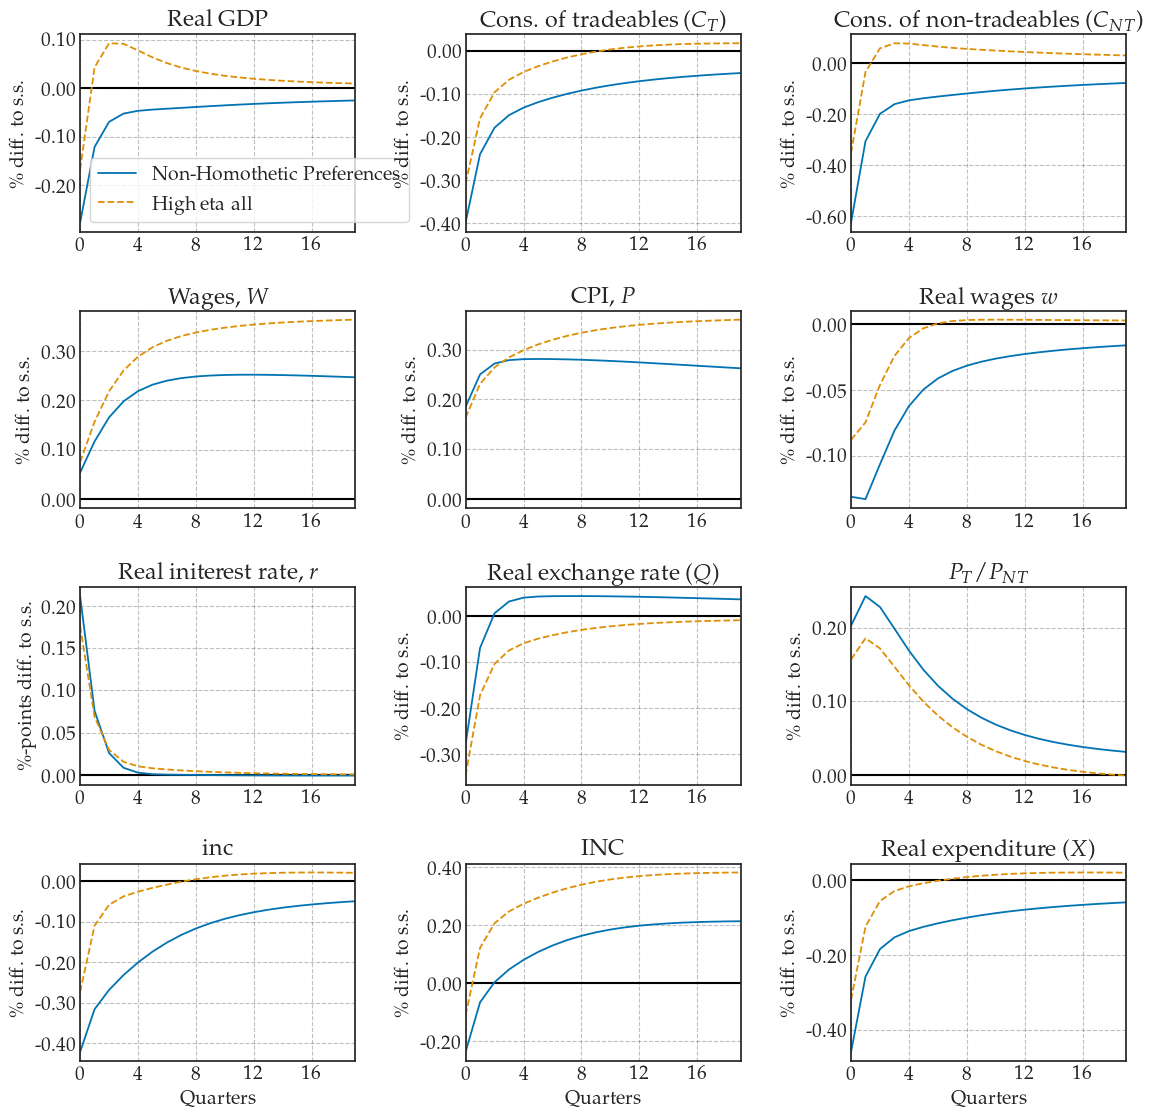

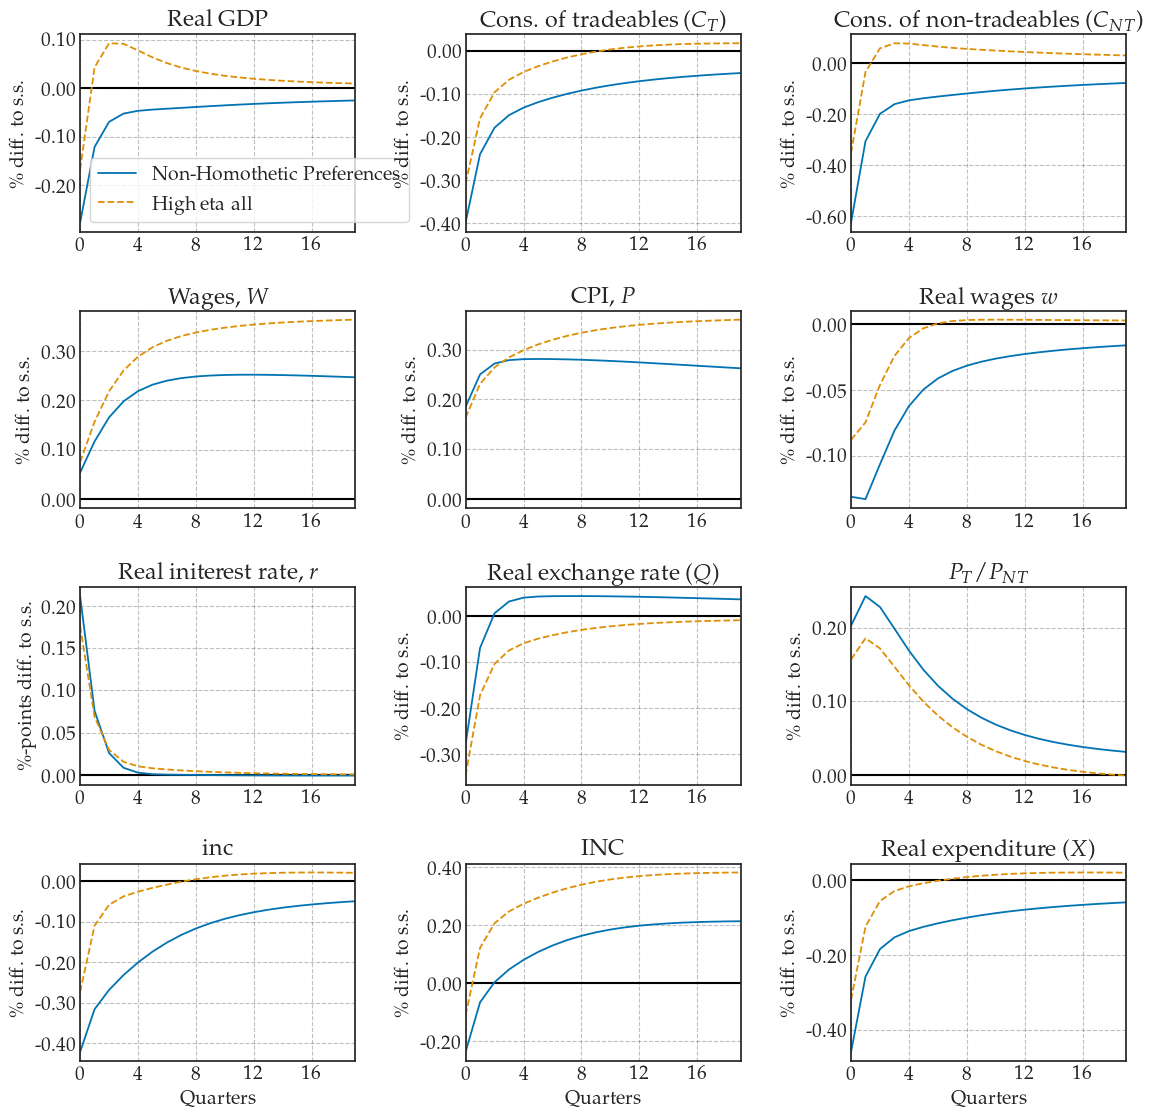

In [5]:
model_high_eta = IHANKModelClass(name='High eta all')
model_high_eta.par.etaE = 2.0
model_high_eta.par.gamma = 0.1
model_high_eta.par.etaF = 2.0
model_high_eta.par.eta_s = 2.0

model_high_eta.find_ss()
model_high_eta.compute_jacs()
model_high_eta.find_transition_path(shocks=shock, do_end_check=False)

fig = figs.show_IRFs([model_baseline, model_high_eta], maxcol=3)



# Correlations

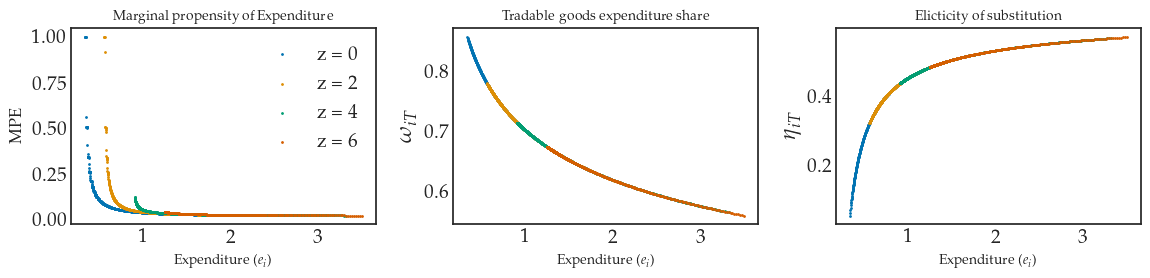

In [9]:
# model_baseline.calc_additional_new()
fig = figs.plot_cor_e(model_baseline)
if save_figs: fig.savefig('plots/cor_e.png', dpi=300, bbox_inches='tight')